In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [149]:
# importing data

df=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [150]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [151]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [152]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [154]:
df.shape

(614, 13)

In [155]:
# lets check for abnormal values by taking unique values present in categorical data
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())
print(df['Credit_History'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']
[ 1.  0. nan]


In [156]:
# lets check for abnormal values in test by taking unique values present in categorical data
print(df2['Gender'].unique())
print(df2['Married'].unique())
print(df2['Dependents'].unique())
print(df2['Education'].unique())
print(df2['Self_Employed'].unique())
print(df2['Property_Area'].unique())
print(df2['Credit_History'].unique())

#changing dependents in test data numeric
df2['Dependents']=df2['Dependents'].replace('3+','3')
df2['Dependents']=pd.to_numeric(df2['Dependents'])
print(df2['Dependents'].unique())

['Male' 'Female' nan]
['Yes' 'No']
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Semiurban' 'Rural']
[ 1. nan  0.]
[ 0.  1.  2.  3. nan]


In [157]:
# there seems to be nan values in gender, married, dependents, self_employed and loan credit.
# HANDLING MISSING VALUES



In [158]:
# gender
df['Gender']=df["Gender"].fillna(df['Gender'].mode()[0])
df['Gender'].isna().sum()

0

In [159]:

#married

#df['Married'].isna().sum()
#df['Married'].value_counts() since count of yes is more than no, we will replace missig values with yes

df["Married"]= df["Married"].fillna(df["Married"].mode()[0])
df["Married"].isna().sum()

0

In [160]:

# Dependents

#df["Dependents"].info() since type is object, we have to chance it to numeric. but before that we need to replace the object 3+ with 3
df['Dependents']=df['Dependents'].replace('3+','3')
print(df['Dependents'].unique())
print(df['Dependents'].value_counts())

['0' '1' '2' '3' nan]
Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64


In [161]:
df['Dependents'].isna().sum()

15

In [162]:

print(df['Dependents'][df["Married"]=='Yes'].value_counts())
df['Dependents'][df["Married"]=='No'].value_counts()

Dependents
0    174
2     93
1     79
3     44
Name: count, dtype: int64


,count
Dependents,
0,171
1,23
2,8
3,7


In [163]:

# married or not, dependents are mostly 0. therefor filling nan with 0
df['Dependents']=df["Dependents"].fillna('0')
df["Dependents"]=pd.to_numeric(df["Dependents"])
df["Dependents"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


In [164]:
# self employment
print("Nan count = ",df['Self_Employed'].isna().sum())
print(df['Self_Employed'].value_counts())
# since No outweighs yes significantly, lets replace the 32 nan values with NO


df['Self_Employed']=df['Self_Employed'].fillna('No')
print("After fixing nan values")
print("Nan count = ",df['Self_Employed'].isna().sum())
print(df['Self_Employed'].value_counts())


Nan count =  32
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
After fixing nan values
Nan count =  0
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


In [165]:
# Credit history
print(df['Credit_History'].isna().sum())
print(df['Credit_History'].value_counts())


# fillling nans with 1

df['Credit_History']=df['Credit_History'].fillna(1)
print(df['Credit_History'].isna().sum())
print(df['Credit_History'].value_counts())

50
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
0
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


All missing values in categorical data has been handled


In [166]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [167]:
# we have to upsample the No value data to avoid disparity

yes_data = df[df['Loan_Status'] == 'Y']
no_data = df[df['Loan_Status'] == 'N']

no_data_upsampled = no_data.sample(n=len(yes_data), replace=True, random_state=42)

df = pd.concat([yes_data, no_data_upsampled])
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,422


In [168]:
#df

In [169]:
num_df=df.select_dtypes(include=['int64','float64'])
#num_df

In [170]:
# since dependents and credit_history is encoded categorical data, lets drop it and add it to categorical data column
cat_df= df.select_dtypes(include=['object'])
cat_df=pd.concat([cat_df,num_df[['Dependents','Credit_History']]],axis=1)
num_df.drop(['Dependents','Credit_History'],axis=1,inplace=True)
#cat_df

In [171]:
# since loan_status is target, we need to isolate it. but before that lets check for missing loan status values
print(cat_df["Loan_Status"].isna().sum())

0


In [172]:
target=cat_df['Loan_Status']
cat_df.drop("Loan_Status",axis=1,inplace=True)

In [173]:
# handling missing values in numeical data
print(num_df.isna().sum())
num_df

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           41
Loan_Amount_Term     16
dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
5,5417,4196.0,267.0,360.0
...,...,...,...,...
153,2281,0.0,113.0,360.0
489,2435,0.0,75.0,360.0
589,2726,0.0,106.0,360.0
186,2178,0.0,66.0,300.0


In [174]:
print(num_df['CoapplicantIncome'].isna().sum(),"\n\n")
#print(num_df['CoapplicantIncome'].unique())

# no missing values in coapplicantincome

0 




In [175]:
print(num_df['ApplicantIncome'].isna().sum(),"\n\n")
#print(num_df['ApplicantIncome'].unique())


0 




In [176]:
print(num_df['Loan_Amount_Term'].isna().sum(),"\n\n")
print(num_df['Loan_Amount_Term'].unique())

# it seems loan amount term too is categorical data

16 


[360. 120. 240.  nan  60. 300. 180. 480.  84.  12.  36.]


In [177]:
cat_df=pd.concat([cat_df,num_df["Loan_Amount_Term"]],axis=1)
num_df.drop("Loan_Amount_Term",axis=1,inplace=True)
cat_df

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Credit_History,Loan_Amount_Term
0,LP001002,Male,No,Graduate,No,Urban,0,1.0,360.0
2,LP001005,Male,Yes,Graduate,Yes,Urban,0,1.0,360.0
3,LP001006,Male,Yes,Not Graduate,No,Urban,0,1.0,360.0
4,LP001008,Male,No,Graduate,No,Urban,0,1.0,360.0
5,LP001011,Male,Yes,Graduate,Yes,Urban,2,1.0,360.0
...,...,...,...,...,...,...,...,...,...
153,LP001532,Male,Yes,Not Graduate,No,Rural,2,1.0,360.0
489,LP002556,Male,No,Graduate,No,Urban,0,1.0,360.0
589,LP002926,Male,Yes,Graduate,Yes,Semiurban,2,0.0,360.0
186,LP001641,Male,Yes,Graduate,Yes,Rural,1,0.0,300.0


In [178]:
# filling missing values of loan amount term
print("nan count =",cat_df['Loan_Amount_Term'].isna().sum(),"\n")
print(cat_df["Loan_Amount_Term"].value_counts())

nan count = 16 

Loan_Amount_Term
360.0    705
180.0     61
480.0     21
300.0     20
240.0      8
84.0       5
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


In [179]:
# since count of value 360 outweighs all other significantly, nan can be filled with 360
cat_df['Loan_Amount_Term']=cat_df['Loan_Amount_Term'].fillna(360)
print("nan count =",cat_df['Loan_Amount_Term'].isna().sum(),"\n")

nan count = 0 



In [180]:
# loan amount
print("nan count =",num_df["LoanAmount"].isna().sum,"\n\n")

num_df["LoanAmount"].describe()

nan count = <bound method Series.sum of 0       True
2      False
3      False
4      False
5      False
       ...  
153    False
489    False
589    False
186    False
600    False
Name: LoanAmount, Length: 844, dtype: bool> 




,LoanAmount
count,803.000000
mean,155.890411
std,94.811589
min,9.000000
25%,104.000000
50%,130.000000
75%,180.000000
max,700.000000


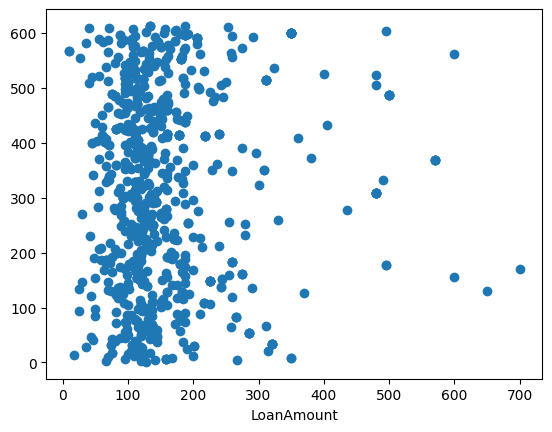

In [181]:
# based on describe the maximum value seems to be a bit too deviated from the trend of quantiles.
# Max value could potentially be an outlier
plt.scatter(num_df["LoanAmount"],num_df.index)
plt.xlabel("LoanAmount")
plt.show()

After handling outliers


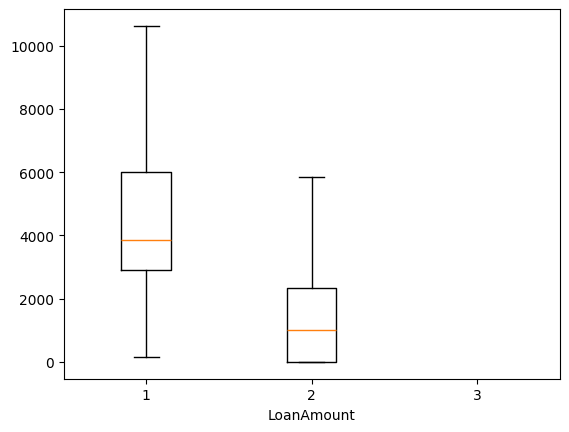

In [182]:
# since graph too is indicating potential outliers, lets handle outliers before filling nan values.
# but i wouldnt be removing the outliers, handling the ouliers only to get true mean value to fill nan values
num_df_dummy=num_df.copy()
def replace_outliers(df,col_name):
    q1= df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    up_bound= q3 + 1.5*iqr
    low_bound= q1 - 1.5* iqr

    #outliers = df[(df[col_name] < low_bound) | (df[col_name] > up_bound)]
    df[col_name]=df[col_name].clip(upper=up_bound)
    df[col_name]=df[col_name].clip(lower=low_bound)
    #print(f"\n{col_name}\n",outliers[col_name])
    return df[col_name]

for col in num_df_dummy.columns:
    num_df_dummy[col]=replace_outliers(num_df_dummy,col)

print("After handling outliers")
plt.boxplot(num_df_dummy)
plt.xlabel("LoanAmount")
plt.show()

In [183]:
m=num_df_dummy['LoanAmount'].mean()
num_df['LoanAmount']=num_df['LoanAmount'].fillna(m)
num_df['LoanAmount'].describe()

,LoanAmount
count,844.000000
mean,155.433304
std,92.499381
min,9.000000
25%,105.000000
50%,133.000000
75%,176.500000
max,700.000000


In [184]:
num_df.isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


ALL missing values in all columns have been handled

# Scaling the training data

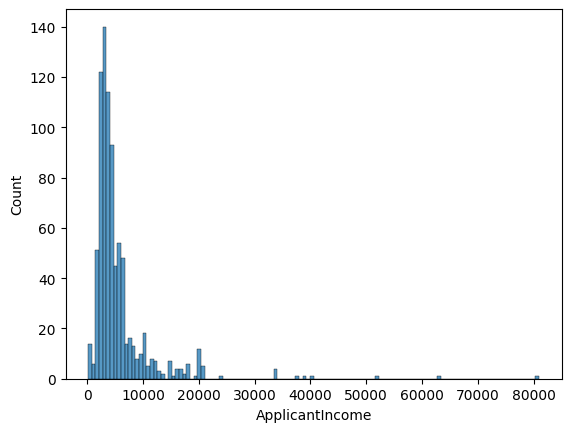

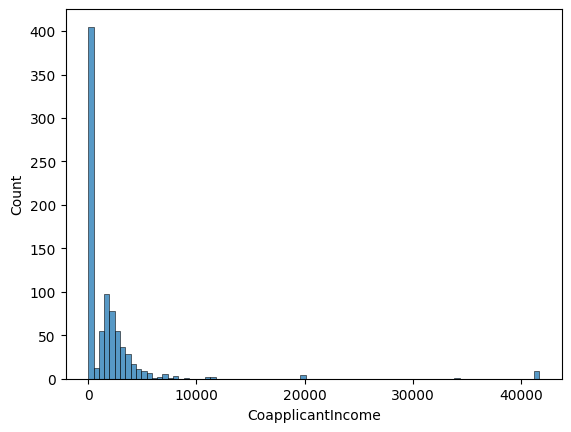

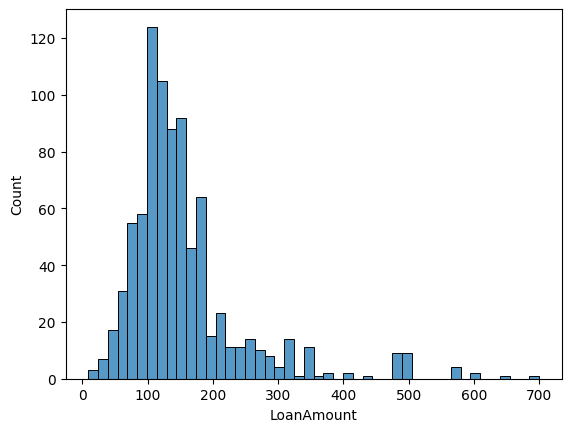

<Figure size 640x480 with 0 Axes>

In [185]:
sns.histplot(num_df['ApplicantIncome'])
plt.xlabel("ApplicantIncome")
plt.show()
sns.histplot(num_df['CoapplicantIncome'])
plt.xlabel("CoapplicantIncome")
plt.show()
sns.histplot(num_df['LoanAmount'])
plt.xlabel("LoanAmount")
plt.show()
plt.tight_layout()


In [187]:
# Without handling outliers, all of them seem skewed, so lets use minmax scaling
minmax= MinMaxScaler()
#std= StandardScaler()

num_df['ApplicantIncome']=minmax.fit_transform(num_df[['ApplicantIncome']])
num_df['CoapplicantIncome']=minmax.fit_transform(num_df[['CoapplicantIncome']])
num_df['LoanAmount']=minmax.fit_transform(num_df[['LoanAmount']])

num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.070489,0.000000,0.198959
2,0.035250,0.000000,0.082489
3,0.030093,0.056592,0.160637
4,0.072356,0.000000,0.191027
5,0.065145,0.100703,0.373372
...,...,...,...
153,0.026357,0.000000,0.150507
489,0.028262,0.000000,0.095514
589,0.031861,0.000000,0.140376
186,0.025083,0.000000,0.082489


# handling missing values and Scaling test data



In [198]:
df2.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [200]:
# gender
df2['Gender']=df2["Gender"].fillna(df2['Gender'].mode()[0])
df2['Gender'].isna().sum()
#married

#df['Married'].isna().sum()
#df['Married'].value_counts() since count of yes is more than no, we will replace missig values with yes

df2["Married"]= df2["Married"].fillna(df2["Married"].mode()[0])
df2["Married"].isna().sum()
# Dependents

#df["Dependents"].info() since type is object, we have to chance it to numeric. but before that we need to replace the object 3+ with 3
df2['Dependents']=df2['Dependents'].replace('3+','3')
df2['Dependents'][df2["Married"]=='No'].value_counts()
# married or not, dependents are mostly 0. therefor filling nan with 0
df2['Dependents']=df2["Dependents"].fillna('0')
df2["Dependents"]=pd.to_numeric(df2["Dependents"])

df2['Self_Employed']=df2['Self_Employed'].fillna('No')

# fillling nans with 1

df2['Credit_History']=df2['Credit_History'].fillna(1)


In [201]:
df2.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [218]:
#df2=df2.fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mode())
df2.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [219]:
#df2 = df2.dropna(how='any',axis=0)

# num_df2=df2.select_dtypes(include=['int64','float64'])
# cat_df2=df2.select_dtypes(include=['object'])
loan_id=df2['Loan_ID']
# cat_df2=pd.concat([cat_df2,num_df2[['Dependents','Credit_History',"Loan_Amount_Term"]]],axis=1)
# num_df2.drop(['Dependents','Credit_History',"Loan_Amount_Term"],axis=1,inplace=True)
#cat_df2

In [220]:
df2['Loan_Amount_Term'].unique()

array([360.        , 240.        , 180.        , 136.13259669,
        60.        , 480.        ,  84.        ,  12.        ,
       300.        , 350.        ,  36.        , 120.        ,
         6.        ])

In [221]:
minmax= MinMaxScaler()
std= StandardScaler()

df2['ApplicantIncome']=std.fit_transform(df2[['ApplicantIncome']])
df2['CoapplicantIncome']=minmax.fit_transform(df2[['CoapplicantIncome']])
df2['LoanAmount']=std.fit_transform(df2[['LoanAmount']])

df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,0.186461,0.000000,-0.429368,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,-0.352692,0.062500,-0.166482,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,0.039641,0.075000,1.180807,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,-0.502774,0.106083,-0.593671,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,-0.311909,0.000000,-0.955139,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,-0.162439,0.074042,-0.380077,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,-0.132056,0.029542,-0.347216,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,-0.317211,0.083042,-0.166482,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,0.039641,0.099708,0.359289,360.0,1.0,Rural


# Encoding categorical in train data

In [188]:
# since loan ID is unique and irrelevant for training, lets drop it
cat_df=cat_df.drop("Loan_ID",axis=1)
cat_df

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Credit_History,Loan_Amount_Term
0,Male,No,Graduate,No,Urban,0,1.0,360.0
2,Male,Yes,Graduate,Yes,Urban,0,1.0,360.0
3,Male,Yes,Not Graduate,No,Urban,0,1.0,360.0
4,Male,No,Graduate,No,Urban,0,1.0,360.0
5,Male,Yes,Graduate,Yes,Urban,2,1.0,360.0
...,...,...,...,...,...,...,...,...
153,Male,Yes,Not Graduate,No,Rural,2,1.0,360.0
489,Male,No,Graduate,No,Urban,0,1.0,360.0
589,Male,Yes,Graduate,Yes,Semiurban,2,0.0,360.0
186,Male,Yes,Graduate,Yes,Rural,1,0.0,300.0


In [189]:
# Gender, Married, Education, Self_employed , Credit_ history is binary. so lets encode accordingly
lb_enc=LabelEncoder()
cat_df['Gender']=lb_enc.fit_transform(cat_df['Gender'])
cat_df['Married']=lb_enc.fit_transform(cat_df['Married'])
cat_df['Education']=lb_enc.fit_transform(cat_df['Education'])
cat_df['Self_Employed']=lb_enc.fit_transform(cat_df['Self_Employed'])
cat_df['Credit_History']=lb_enc.fit_transform(cat_df['Credit_History'])
cat_df

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Credit_History,Loan_Amount_Term
0,1,0,0,0,Urban,0,1,360.0
2,1,1,0,1,Urban,0,1,360.0
3,1,1,1,0,Urban,0,1,360.0
4,1,0,0,0,Urban,0,1,360.0
5,1,1,0,1,Urban,2,1,360.0
...,...,...,...,...,...,...,...,...
153,1,1,1,0,Rural,2,1,360.0
489,1,0,0,0,Urban,0,1,360.0
589,1,1,0,1,Semiurban,2,0,360.0
186,1,1,0,1,Rural,1,0,300.0


In [190]:

# Loan_Amount_Term is heirarchical
l=cat_df['Loan_Amount_Term'].unique()
lst=list(np.sort(l))

ord_enc=OrdinalEncoder(categories=[lst])
cat_df['Loan_Amount_Term']=ord_enc.fit_transform(cat_df[['Loan_Amount_Term']])
cat_df

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Credit_History,Loan_Amount_Term
0,1,0,0,0,Urban,0,1,8.0
2,1,1,0,1,Urban,0,1,8.0
3,1,1,1,0,Urban,0,1,8.0
4,1,0,0,0,Urban,0,1,8.0
5,1,1,0,1,Urban,2,1,8.0
...,...,...,...,...,...,...,...,...
153,1,1,1,0,Rural,2,1,8.0
489,1,0,0,0,Urban,0,1,8.0
589,1,1,0,1,Semiurban,2,0,8.0
186,1,1,0,1,Rural,1,0,7.0


In [191]:

# Property_Area has no order of preference. therefore lets one hot encode it
cat_df=pd.get_dummies(cat_df,columns=['Property_Area'],prefix='col',dtype=int, drop_first=True)
cat_df

,Gender,Married,Education,Self_Employed,Dependents,Credit_History,Loan_Amount_Term,col_Semiurban,col_Urban
0,1,0,0,0,0,1,8.0,0,1
2,1,1,0,1,0,1,8.0,0,1
3,1,1,1,0,0,1,8.0,0,1
4,1,0,0,0,0,1,8.0,0,1
5,1,1,0,1,2,1,8.0,0,1
...,...,...,...,...,...,...,...,...,...
153,1,1,1,0,2,1,8.0,0,0
489,1,0,0,0,0,1,8.0,0,1
589,1,1,0,1,2,0,8.0,1,0
186,1,1,0,1,1,0,7.0,0,0


# Encoding test categories

In [222]:
print(df2['Loan_Amount_Term'].unique())
print(final_df['Loan_Amount_Term'].unique())

[360.         240.         180.         136.13259669  60.
 480.          84.          12.         300.         350.
  36.         120.           6.        ]
[8. 4. 6. 2. 7. 5. 9. 3. 0. 1.]


In [223]:
# since loan ID is unique and irrelevant for training, lets drop it
df2=df2.drop("Loan_ID",axis=1)
# Gender, Married, Education, Self_employed , Credit_ history is binary. so lets encode accordingly
lb_enc=LabelEncoder()
df2['Gender']=lb_enc.fit_transform(df2['Gender'])
df2['Married']=lb_enc.fit_transform(df2['Married'])
df2['Education']=lb_enc.fit_transform(df2['Education'])
df2['Self_Employed']=lb_enc.fit_transform(df2['Self_Employed'])
df2['Credit_History']=lb_enc.fit_transform(df2['Credit_History'])

# Loan_Amount_Term is heirarchical
l=df2['Loan_Amount_Term'].unique()
lst=list(np.sort(l))

ord_enc=OrdinalEncoder(categories=[lst])
df2['Loan_Amount_Term']=ord_enc.fit_transform(df2[['Loan_Amount_Term']])

# Property_Area has no order of preference. therefore lets one hot encode it
df2=pd.get_dummies(df2,columns=['Property_Area'],prefix='col',dtype=int, drop_first=True)
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,col_Semiurban,col_Urban
0,1,1,0.0,0,0,0.186461,0.000000,-0.429368,11.0,1,0,1
1,1,1,1.0,0,0,-0.352692,0.062500,-0.166482,11.0,1,0,1
2,1,1,2.0,0,0,0.039641,0.075000,1.180807,11.0,1,0,1
3,1,1,2.0,0,0,-0.502774,0.106083,-0.593671,11.0,1,0,1
4,1,0,0.0,1,0,-0.311909,0.000000,-0.955139,11.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3.0,1,1,-0.162439,0.074042,-0.380077,11.0,1,0,1
363,1,1,0.0,0,0,-0.132056,0.029542,-0.347216,11.0,1,0,1
364,1,0,0.0,0,0,-0.317211,0.083042,-0.166482,11.0,1,1,0
365,1,1,0.0,0,0,0.039641,0.099708,0.359289,11.0,1,0,0


In [242]:
loan_id

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


# Model Training

In [192]:
final_df= pd.concat([cat_df,num_df],axis=1)
final_df

,Gender,Married,Education,Self_Employed,Dependents,Credit_History,Loan_Amount_Term,col_Semiurban,col_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,0,0,1,8.0,0,1,0.070489,0.000000,0.198959
2,1,1,0,1,0,1,8.0,0,1,0.035250,0.000000,0.082489
3,1,1,1,0,0,1,8.0,0,1,0.030093,0.056592,0.160637
4,1,0,0,0,0,1,8.0,0,1,0.072356,0.000000,0.191027
5,1,1,0,1,2,1,8.0,0,1,0.065145,0.100703,0.373372
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,1,0,2,1,8.0,0,0,0.026357,0.000000,0.150507
489,1,0,0,0,0,1,8.0,0,1,0.028262,0.000000,0.095514
589,1,1,0,1,2,0,8.0,1,0,0.031861,0.000000,0.140376
186,1,1,0,1,1,0,7.0,0,0,0.025083,0.000000,0.082489


In [193]:
X_train,X_test,y_train,y_test=train_test_split(final_df,target,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(675, 12)
(169, 12)
(675,)
(169,)


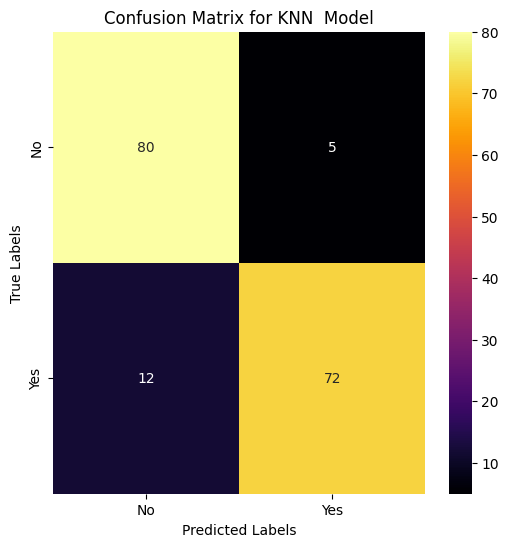


 ACCURACY KNN :  89.94082840236686


In [244]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_Knn = knn.predict(X_test)

conf_mat_knn=confusion_matrix(y_test,y_pred_Knn)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="inferno", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for KNN  Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\n ACCURACY KNN : ",accuracy_score(y_test,y_pred_Knn)*100)

# NAIVE BAYES

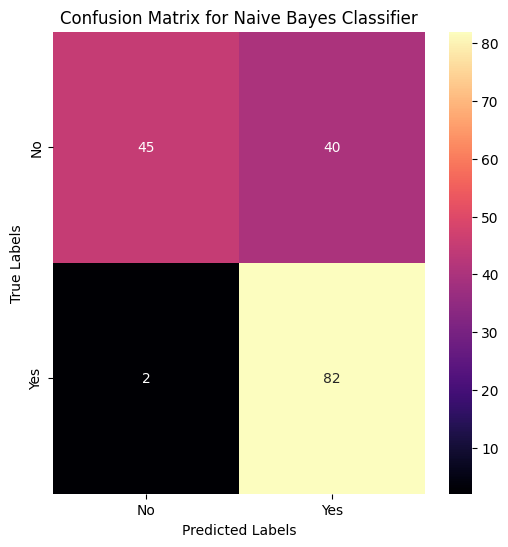


 ACCURACY Naive Bayes :  75.14792899408283


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_NB = nb_classifier.predict(X_test)


conf_mat_NB=confusion_matrix(y_test,y_pred_NB)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_NB, annot=True, fmt="d", cmap="magma", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



print("\n ACCURACY Naive Bayes : ",accuracy_score(y_test,y_pred_NB)*100)

# Random Forest Classifier

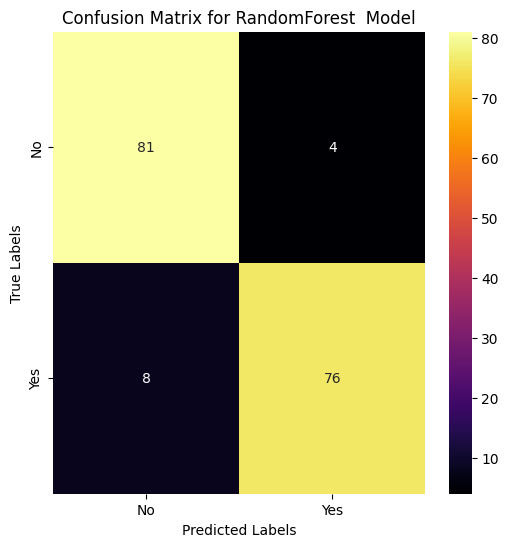


 ACCURACY KNN :  92.89940828402366


In [240]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

conf_mat_rf=confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt="d", cmap="inferno", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for RandomForest  Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\n ACCURACY KNN : ",accuracy_score(y_test,y_pred_rf)*100)

In [224]:
# testing model on test.csv file
final_df2= df2[["Gender","Married","Education","Self_Employed","Dependents","Credit_History","Loan_Amount_Term","col_Semiurban","col_Urban","ApplicantIncome","CoapplicantIncome","LoanAmount"]]


In [225]:
final_df2['Dependents']=final_df2['Dependents'].replace('3+','3')
final_df2['Dependents']=pd.to_numeric(final_df2['Dependents'])


In [226]:
final_df2=final_df2.fillna(0)

In [229]:
test_y_pred_rf=rf.predict(final_df2)
test_y_pred_rf.shape

(367,)

In [230]:
loan_status=pd.DataFrame(test_y_pred_rf,columns=['Loan_Status'])
# dic= {
#       "LOAN_ID" : loan_id.values,
#       "LOAN_STATUS" : loan_status.values
# }

# dic
loanID=pd.DataFrame(loan_id,columns=['Loan_ID'])
loanID=loanID.reset_index(drop=True)
sub_rf=pd.concat([loanID,loan_status],axis=1)
sub_rf

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [231]:
sub_rf.to_csv("RandomForest_result.csv",index=False)

# Out of KNN, Naive Bayes and RandomForest, the RandomForest Clssifier gave the Best accuracy in predicting with a score of 92.8%